In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pymongo import MongoClient
import json 

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
client.list_database_names()

['admin', 'config', 'local', 'mydb']

In [4]:
db = client["mydb"]
col = db["Salary"]

In [5]:
cursor = col.find({})
data_from_mongo = list(cursor)

In [20]:
for document in cursor:
    print(document)

In [7]:
json_data = json.dumps(data_from_mongo, default=str, indent=4)

In [8]:
print(json_data)

[
    {
        "_id": "65a03faf9d0b1947666351fb",
        "YearsExperience": "1.1",
        "Salary": "39343"
    },
    {
        "_id": "65a03faf9d0b1947666351fc",
        "YearsExperience": "1.3",
        "Salary": "46205"
    },
    {
        "_id": "65a03faf9d0b1947666351fd",
        "YearsExperience": "1.5",
        "Salary": "37731"
    },
    {
        "_id": "65a03faf9d0b1947666351fe",
        "YearsExperience": "2",
        "Salary": "43525"
    },
    {
        "_id": "65a03faf9d0b1947666351ff",
        "YearsExperience": "2.2",
        "Salary": "39891"
    },
    {
        "_id": "65a03faf9d0b194766635200",
        "YearsExperience": "2.9",
        "Salary": "56642"
    },
    {
        "_id": "65a03faf9d0b194766635201",
        "YearsExperience": "3",
        "Salary": "60150"
    },
    {
        "_id": "65a03faf9d0b194766635202",
        "YearsExperience": "3.2",
        "Salary": "54445"
    },
    {
        "_id": "65a03faf9d0b194766635203",
        "YearsExperience"

In [35]:
print(len(json_data))

472


In [9]:
df = pd.read_json(json_data)

C:\Users\sharn\AppData\Local\Temp\ipykernel_4764\3067332036.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json_data)


In [10]:
print(df)

                         _id  YearsExperience  Salary
0   65a03faf9d0b1947666351fb              1.1   39343
1   65a03faf9d0b1947666351fc              1.3   46205
2   65a03faf9d0b1947666351fd              1.5   37731
3   65a03faf9d0b1947666351fe              2.0   43525
4   65a03faf9d0b1947666351ff              2.2   39891
5   65a03faf9d0b194766635200              2.9   56642
6   65a03faf9d0b194766635201              3.0   60150
7   65a03faf9d0b194766635202              3.2   54445
8   65a03faf9d0b194766635203              3.2   64445
9   65a03faf9d0b194766635204              3.7   57189
10  65a03faf9d0b194766635205              3.9   63218
11  65a03faf9d0b194766635206              4.0   55794
12  65a03faf9d0b194766635207              4.0   56957
13  65a03faf9d0b194766635208              4.1   57081
14  65a03faf9d0b194766635209              4.5   61111
15  65a03faf9d0b19476663520a              4.9   67938
16  65a03faf9d0b19476663520b              5.1   66029
17  65a03faf9d0b19476663520c

In [11]:
df.isnull().sum()

_id                0
YearsExperience    0
Salary             0
dtype: int64

In [12]:
df = df.drop('_id', axis=1, errors='ignore' )

In [37]:
print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5 

In [38]:
print(len(df))

35


In [39]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
df.duplicated().sum()

0

<Axes: >

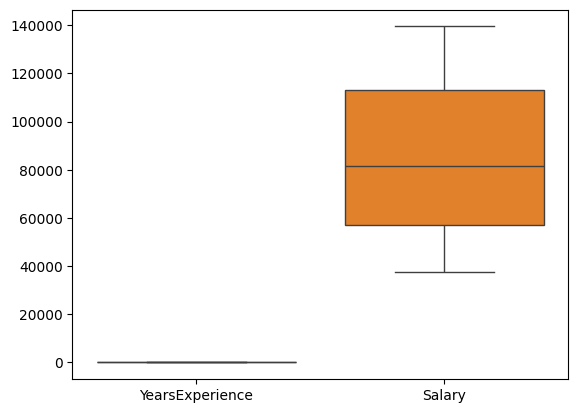

In [17]:
sns.boxplot(df)

In [18]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


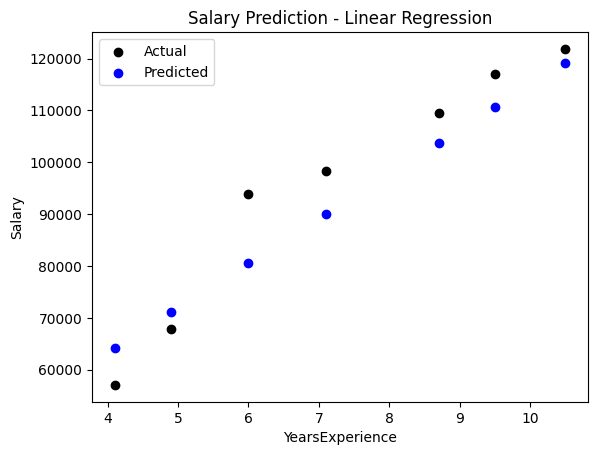

Mean Absolute Error (MAE): 6692.364094497284
Mean Squared Error (MSE): 55761791.306260146
R-squared (R2): 0.8914234140042779


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['YearsExperience']]
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize predictions vs. actual values
plt.scatter(result_df['YearsExperience'], result_df['Actual'], color='black', label='Actual')
plt.scatter(result_df['YearsExperience'], result_df['Predicted'], color='blue', label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction - Linear Regression')
plt.legend()
plt.show()

# Calculate evaluation metrics
mae = mean_absolute_error(result_df['Actual'], result_df['Predicted'])
mse = mean_squared_error(result_df['Actual'], result_df['Predicted'])
r2 = r2_score(result_df['Actual'], result_df['Predicted'])

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

In [34]:
print(len(result_df))

7


In [31]:
new_data = {
    'YearsExperience': X_test['YearsExperience'].tolist(),
    'Actual': y_test.tolist(),
    'Predicted': y_pred.tolist(),
    'MAE': mae,
    'MSE': mse,
    'r2': r2
}

In [32]:
print(new_data)

{'YearsExperience': [9.5, 4.1, 8.7, 7.1, 4.9, 10.5, 6.0], 'Actual': [116969, 57081, 109431, 98273, 67938, 121872, 93940], 'Predicted': [110576.91706292318, 64251.57268881918, 103713.90308157443, 89987.87511887695, 71114.58667016792, 119155.68453960911, 80551.23089452244], 'MAE': 6692.364094497284, 'MSE': 55761791.306260146, 'r2': 0.8914234140042779}
